<a href="https://colab.research.google.com/github/JanaAliCS/machine_leanring/blob/main/assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🧠 Assignment: Explainability in Machine Learning


In [1]:
import pandas as pd

In [2]:
loan_data = pd.read_csv('loans_data.csv')

## Section 1 – Dataset Understanding

**Instructions:** Load the dataset and inspect its structure. Summarize clear, specific observations about its shape, data types, and missing values.

Q1.1: What is the shape of the dataset (number of rows and columns)? **(2 pts)**

In [5]:
#.shape prints out (#of rows, #of cols)

print("Rows: ", loan_data.shape[0])
print("Columns: ", loan_data.shape[1])

Rows:  46370
Columns:  24


**Q1.2**: What are the primary data types of the features (numeric, categorical, etc.)? **(2 pts)**

In [7]:
#to know the datatypes we have

loan_data.dtypes

,0
id,int64
acc_now_delinq,float64
addr_state,object
annual_inc,float64
delinq_2yrs,float64
dti,float64
emp_length,object
grade,object
home_ownership,object
initial_list_status,object


In [9]:
#primary data types means: 1. numeric (int, float) 2. categorical(object, bool) 3. date/time
#we have in loan data: float64, int64, object

primary_types = loan_data.dtypes.replace({'int64':'Numeric', 'float64':'Numeric', 'object':'Categorical'})
primary_types


,0
id,Numeric
acc_now_delinq,Numeric
addr_state,Categorical
annual_inc,Numeric
delinq_2yrs,Numeric
dti,Numeric
emp_length,Categorical
grade,Categorical
home_ownership,Categorical
initial_list_status,Categorical


**Q1.3**: Are there any missing values in the dataset? If yes, mention which columns contain them and their approximate percentage. **(3 pts)**

In [14]:
#count those who are null -> loan_data.isnull().sum()
#then get their percentage
#loc.lamda --- > leaves those who have have any null values only

missing_info = (loan_data.isnull().sum() / len(loan_data) * 100).loc[lambda x: x > 0]
missing_info

,0
emp_length,2.712961
mths_since_last_delinq,62.391633
mths_since_last_record,90.920854
purpose,0.002157
term,0.002157
total_acc,0.002157
total_rev_hi_lim,0.002157
verification_status,0.002157
good_bad,0.002157


## Section 2 – Exploratory Data Analysis (EDA)

**Q2.1**: Plot the distribution of the target variable. What can you infer about class balance? **(3 pts)**

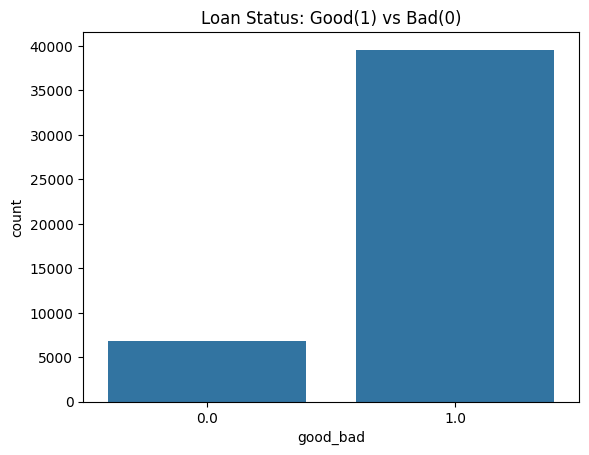

In [25]:
#the target variable is good_bad where bad loan is default (0) and good loan is non_default (1)

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='good_bad', data=loan_data)
plt.title('Loan Status: Good(1) vs Bad(0)')
plt.show()

It can be inferred that there is a class imbalance since more than 70% seem to not default

**Q2.2**: Plot box plots of at least two numeric variables against the target variable. **(5 pts)**

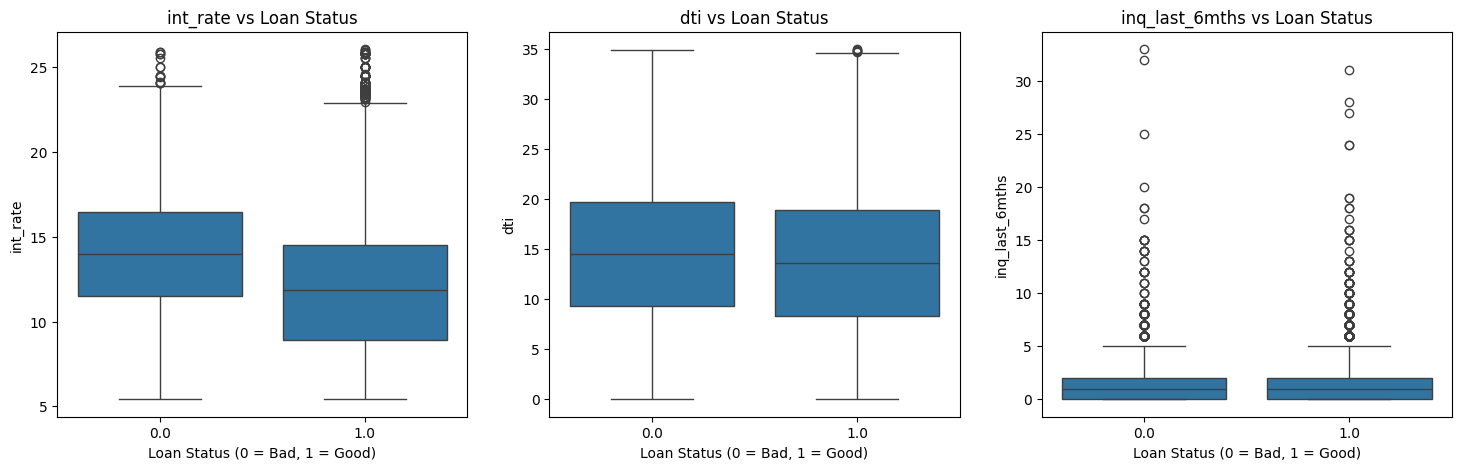

In [34]:
#1.defining two numeric continuous features
numeric_vars = ['int_rate', 'dti','inq_last_6mths']

#plotting the two boxplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, var in enumerate(numeric_vars):
    sns.boxplot(x='good_bad', y=var, data=loan_data, ax=axes[i])
    axes[i].set_xlabel("Loan Status (0 = Bad, 1 = Good)")
    axes[i].set_ylabel(var)
    axes[i].set_title(f"{var} vs Loan Status")
plt.show()

## Section 3 – Weight of Evidence (WoE) & Information Value (IV)

**Q3.1**: Perform *fine classing* on all continuous variables to generate detailed initial bins. **(4 pts)**

**Q3.2**: Apply *coarse classing* by merging adjacent fine classes and categorical feature levels that share similar WoE values across **all features**. **(18 pts)**

**Q3.3**: Create two separate DataFrames:
- One for **Logistic Regression**, where all features are replaced with their WoE-transformed versions.
- One for **Decision Tree**, where the original raw features are preserved.
Explain briefly why these two different representations are required for the respective models. **(3 pts)**

## Section 4 – Model Building

Train both models:
- Logistic Regression (with WoE-transformed variables)
- Decision Tree (with raw variables)



**Q4.1**: Compare both models in terms of precision, recall, and accuracy. Which performs better overall? What trade-offs do you observe between the two? **(10 pts)**

## Section 5 – Explainability and Interpretation

### Part A – Logistic Regression Explainability (Scorecard)

**Q5.1**: Build a scorecard from the logistic regression model and transform coefficients into business scores within the 350–800 range. **(16 pts)**

**Q5.2**: Interpret three model coefficients. What does a positive versus negative sign indicate about credit risk? **(6 pts)**

### Part B – Decision Tree Explainability



**Q6.1**: Visualize the decision tree. Which features appear at the top, and why do you think they are important? **(10 pts)**

**Q6.2**: Choose one leaf node (final decision). Write out the full rule path leading to that node and describe what kind of borrower it represents. **(5 pts)**

**Q6.3**: Compare the simplicity of the decision tree explanation to the numeric interpretability of the logistic model. Which is easier to justify to regulators and why? **(3 pts)**

### Part C – SHAP Explainability

SHAP (SHapley Additive exPlanations) is a popular method for explaining machine learning model predictions. It assigns each feature a value that represents its contribution to a specific prediction, helping us understand how and why the model made certain decisions.

SHAP combines ideas from game theory and explainable AI to provide both global and local interpretations.

You are encouraged to read more about SHAP to deepen your understanding before completing this section.

Recommended starting point: [SHAP documentation](https://shap.readthedocs.io/en/latest/)


**Q7.1**: Generate and display a SHAP summary plot for the decision tree. Which three variables contribute most globally, and why might that be? **(4 pts)**

**Q7.2**: For one test instance, display SHAP force plots for both models. Which model’s explanation aligns better with business intuition? **(4 pts)**

**Q7.3**: In your own words, explain the difference between *global* and *local* interpretability in the context of SHAP. **(2 pts)**